In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
file_path = "filtered_data.csv"
filtered_data = pd.read_csv(file_path)
log_foldChange = filtered_data["log2_foldchange"]

embeddings = np.load('../all_embeddings.npy')

In [3]:
# X = embeddings
# y = log_foldChange

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# r2 = r2_score(y_test, y_pred)
# print(f'R2 Score: {r2}')

# mae = mean_absolute_error(y_test, y_pred)
# print(f'MAE Score: {mae}')

# plt.figure(figsize=(10, 8))
# plt.scatter(y_test, y_pred, s=1)
# plt.xlabel('Actual Fold Change')
# plt.ylabel('Predicted Fold Change')
# plt.title('Actual vs. Predicted Fold Change')
# plt.show()

In [4]:
# X = embeddings
# y = log_foldChange

# # attempt 1
# # Feature Scaling - 
# #   Mean Squared Error: 0.7518582885812563
# #   R2 Score: 0.10700202614964116
# #   MAE Score: 0.6225994537130269
# # scaler = StandardScaler()
# # X = scaler.fit_transform(X)

# # attempt 2
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = Ridge(alpha=0.5)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# r2 = r2_score(y_test, y_pred)
# print(f'R2 Score: {r2}')

# mae = mean_absolute_error(y_test, y_pred)
# print(f'MAE Score: {mae}')

# plt.figure(figsize=(10, 8))
# plt.scatter(y_test, y_pred, s=1)
# plt.xlabel('Actual Fold Change')
# plt.ylabel('Predicted Fold Change')
# plt.title('Actual vs. Predicted Fold Change')
# plt.show()

## With Training Data

In [5]:
train_data = pd.read_csv('../train_data.csv')
features = train_data.iloc[:, 2:]
log_foldChange = train_data["log2_foldchange"]

In [6]:
# X = features
# y = log_foldChange
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# r2 = r2_score(y_test, y_pred)
# print(f'R2 Score: {r2}')

# mae = mean_absolute_error(y_test, y_pred)
# print(f'MAE Score: {mae}')

# plt.figure(figsize=(10, 8))
# plt.scatter(y_test, y_pred, s=1)
# plt.xlabel('Actual Fold Change')
# plt.ylabel('Predicted Fold Change')
# plt.title('Actual vs. Predicted Fold Change')
# plt.show()
# # Latest Values:
# # Mean Squared Error: 0.7233376617468014
# # R2 Score: 0.09615887674079804
# # MAE Score: 0.6171626963191313

Editing:

Mean Squared Error: 0.599701966212495
R2 Score: 0.2506469282225917
MAE Score: 0.5053915598673184


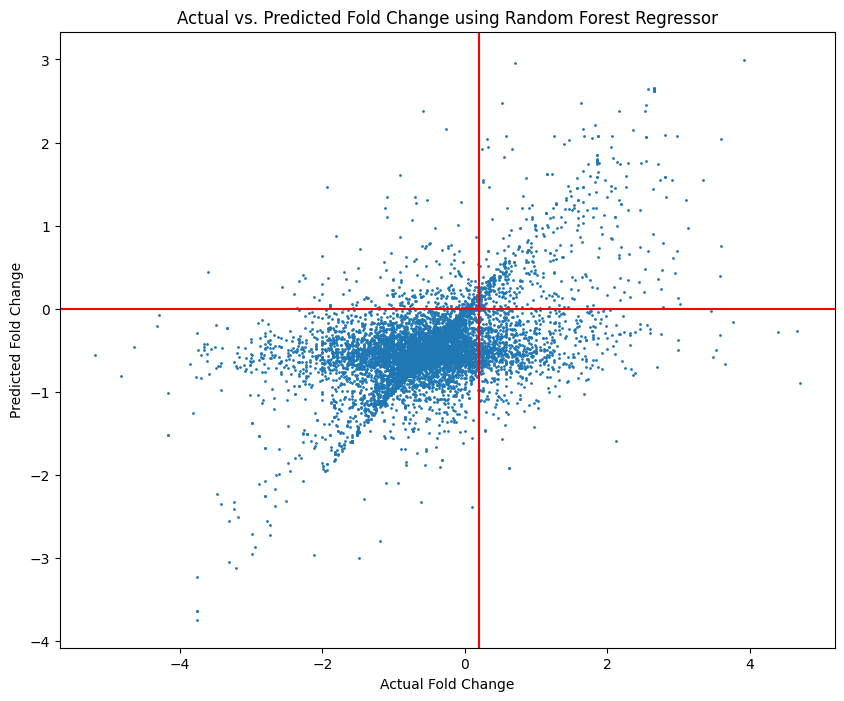

In [7]:
X = features
y = log_foldChange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_rfe = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rfe)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred_rfe)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, y_pred_rfe)
print(f'MAE Score: {mae}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_rfe, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.title('Actual vs. Predicted Fold Change using Random Forest Regressor')
plt.show()
# Latest Values:
# Mean Squared Error: 0.5992294664900981
# R2 Score: 0.25123733668936443
# MAE Score: 0.505280096378512

True Positive Rate: 0.6710280373831776
Precision: 0.4208675263774912
Recall: 0.4015659955257271
Specificity: 0.9367315573770492
Sensitivity: 0.4015659955257271


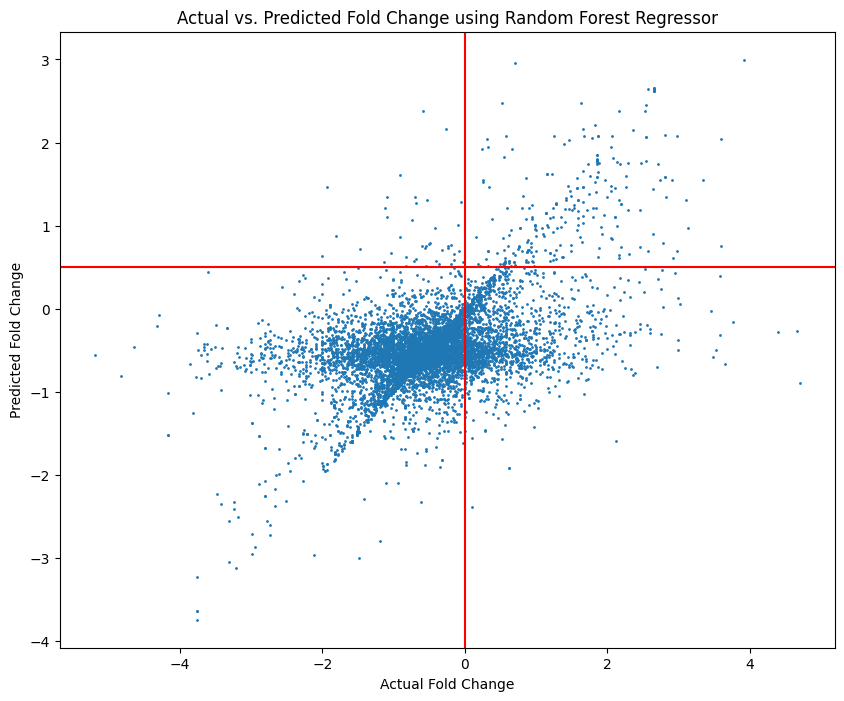

In [45]:
# Cutoff values
cutoff_y = 0.5
cutoff_x = 0

y_test_np = np.array(y_test)
# Calculate the number of points in each quadrant
TP = np.sum((y_test_np >= cutoff_y) & (y_pred_rfe >= cutoff_x))
FP = np.sum((y_test_np < cutoff_y) & (y_pred_rfe >= cutoff_x))
TN = np.sum((y_test_np < cutoff_y) & (y_pred_rfe < cutoff_x))
FN = np.sum((y_test_np >= cutoff_y) & (y_pred_rfe < cutoff_x))
TPR = TP/FN
prec = TP/(TP+FP)
recall = TP/(TP+FN)
spec = TN/(TN+FP)
sens = TP/(TP+FN)
# Print the calculated values
print(f"True Positive Rate: {TPR}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")

# plt.figure(figsize=(10, 8))
# plt.scatter(y_test, y_pred_rfe, s=1)
# plt.xlabel('Actual Fold Change')
# plt.ylabel('Predicted Fold Change')
# plt.axhline(y=cutoff_y, color='r', linestyle='-')
# plt.axvline(x=cutoff_x, color='r', linestyle='-')
# plt.title('Actual vs. Predicted Fold Change using Random Forest Regressor')
# plt.show()

# Cutoff values
# print()
# cutoff_y = 0.5
# cutoff_x = 0.5
# TP = np.sum((y_test_np >= cutoff_y) & (y_pred_rfe >= cutoff_x))
# FP = np.sum((y_test_np < cutoff_y) & (y_pred_rfe >= cutoff_x))
# TN = np.sum((y_test_np < cutoff_y) & (y_pred_rfe < cutoff_x))
# FN = np.sum((y_test_np >= cutoff_y) & (y_pred_rfe < cutoff_x))
# TPR = TP/FN
# prec = TP/(TP+FP)
# recall = TP/(TP+FN)
# spec = TN/(TN+FP)
# sens = TP/(TP+FN)
# # Print the calculated values
# print(f"True Positive Rate: {TPR}")
# print(f"Precision: {prec}")
# print(f"Recall: {recall}")
# print(f"Specificity: {spec}")
# print(f"Sensitivity: {sens}")

# print()
# cutoff_y = 0.5
# cutoff_x = 1.0
# TP = np.sum((y_test_np >= cutoff_y) & (y_pred_rfe >= cutoff_x))
# FP = np.sum((y_test_np < cutoff_y) & (y_pred_rfe >= cutoff_x))
# TN = np.sum((y_test_np < cutoff_y) & (y_pred_rfe < cutoff_x))
# FN = np.sum((y_test_np >= cutoff_y) & (y_pred_rfe < cutoff_x))
# TPR = TP/FN
# prec = TP/(TP+FP)
# recall = TP/(TP+FN)
# spec = TN/(TN+FP)
# sens = TP/(TP+FN)
# # Print the calculated values
# print(f"True Positive Rate: {TPR}")
# print(f"Precision: {prec}")
# print(f"Recall: {recall}")
# print(f"Specificity: {spec}")
# print(f"Sensitivity: {sens}")

# print()
# cutoff_y = 0.5
# cutoff_x = 1.5
# TP = np.sum((y_test_np >= cutoff_y) & (y_pred_rfe >= cutoff_x))
# FP = np.sum((y_test_np < cutoff_y) & (y_pred_rfe >= cutoff_x))
# TN = np.sum((y_test_np < cutoff_y) & (y_pred_rfe < cutoff_x))
# FN = np.sum((y_test_np >= cutoff_y) & (y_pred_rfe < cutoff_x))
# TPR = TP/FN
# prec = TP/(TP+FP)
# recall = TP/(TP+FN)
# spec = TN/(TN+FP)
# sens = TP/(TP+FN)
# # Print the calculated values
# print(f"True Positive Rate: {TPR}")
# print(f"Precision: {prec}")
# print(f"Recall: {recall}")
# print(f"Specificity: {spec}")
# print(f"Sensitivity: {sens}")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_rfe, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.axhline(y=cutoff_y, color='r', linestyle='-')
plt.axvline(x=cutoff_x, color='r', linestyle='-')
plt.title('Actual vs. Predicted Fold Change using Random Forest Regressor')
plt.show()

Mean Squared Error: 0.7356190508795096
MAE Score: 0.6059739703781525
R2 Score: 0.080812759517918


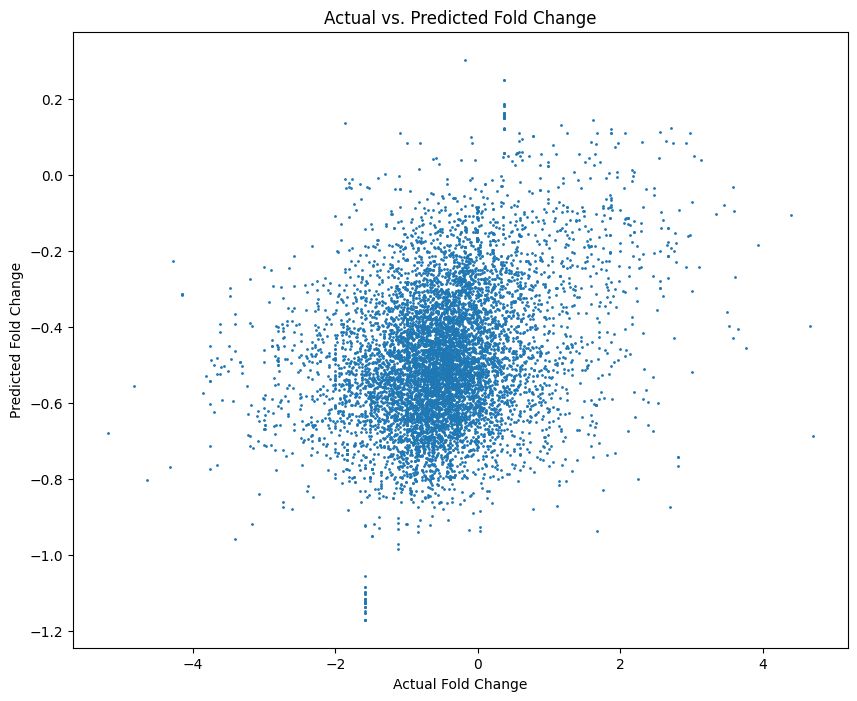

In [ ]:
X = features
y = log_foldChange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Score: {mae}')

r2_score = r2_score(y_test, y_pred)
print(f'R2 Score: {r2_score}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change')
plt.show()
# Latest Values
# Mean Squared Error: 0.7356190508795096
# MAE Score: 0.6059739703781525
# R2 Score: 0.080812759517918

Mean Squared Error: 0.6823871663775234
MAE Score: 0.593149904359074
R2 Score: 0.14732825957537377


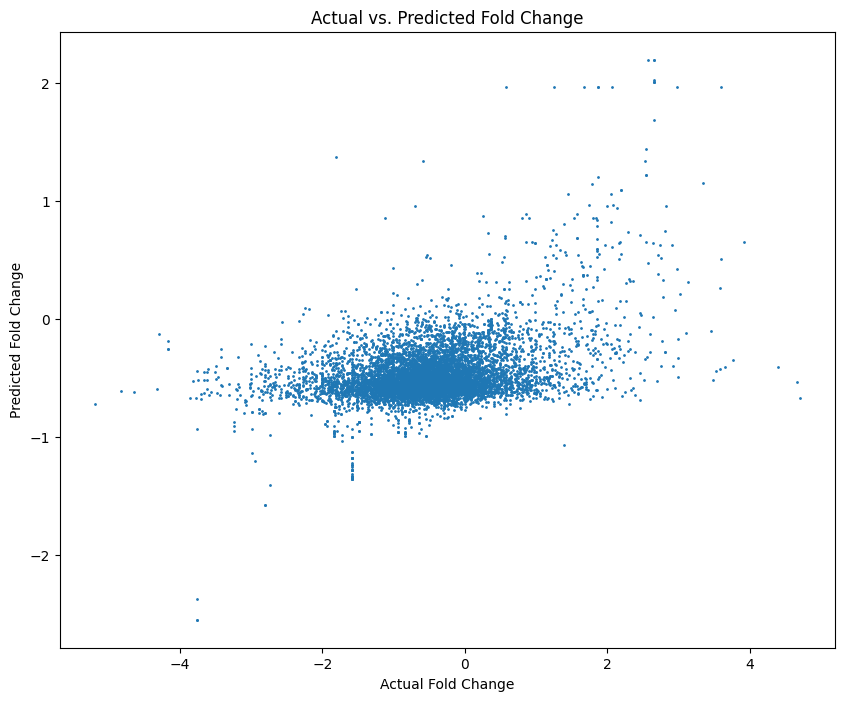

In [ ]:
X = features
y = log_foldChange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Score: {mae}')

r2_score = r2_score(y_test, y_pred)
print(f'R2 Score: {r2_score}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using Gradient Boosting Regression')
plt.show()
# Latest Values
# Mean Squared Error: 0.6823871663775234
# MAE Score: 0.593149904359074
# R2 Score: 0.14732825957537377

In [ ]:
X = features
y = log_foldChange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Score: {mae}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using Random Forest Regressor')
plt.show()

KeyboardInterrupt: 